In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

In [59]:
expression=pd.read_csv(r'DegExpression_with_DiseaseState.csv',  sep = ',')
expression=expression.set_index('ID')
expression

,Disease_state,10023828085,10023850408,10023825703,10023847474,10025903485,10025904077,10025907728,10023839816,10023836075,...,10025907451,10025910185,10025911725,10025906485,10023846977,10025907517,10023819374,10025903934,10025909897,10023835125
ID,,,,,,,,,,,,,,,,,,,,,
1_PFC,A,0.01690,-0.0440,0.02440,0.1050,-0.0149,-0.00427,0.173,-0.2670,0.0384,...,0.0540,0.02750,-0.0250,-0.0158,-0.0520,-0.0151,0.03290,-0.3000,-0.0490,-0.05650
2_PFC,A,0.00363,-0.0758,0.01050,-0.1210,-0.0159,-0.01140,0.145,-0.1550,-0.0984,...,0.3060,0.07060,0.1500,0.0533,0.0258,0.0381,-0.11600,-0.2000,0.1640,-0.00269
5_PFC,A,-0.03550,-0.1180,-0.00782,-0.3320,0.0612,-0.08280,0.164,0.0586,0.0655,...,-0.1610,0.00179,0.1040,0.0179,0.0119,-0.1580,-0.08980,-0.2310,-0.1470,0.02780
6_PFC,A,0.08540,0.1240,0.03210,0.0976,-0.0250,0.03620,0.159,0.1540,0.1330,...,0.1390,0.05940,0.0534,-0.0265,0.0214,-0.0113,0.00480,0.2170,-0.0183,0.07100
8_PFC,A,0.02210,0.1560,0.03560,0.1490,-0.0311,0.03350,0.226,0.2240,-0.0613,...,0.2470,0.10700,0.5150,0.0830,0.0758,0.3620,0.33800,0.6390,0.3160,0.12300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221_PFC,N,-0.10800,-0.1170,-0.05860,-0.1620,0.0469,0.04580,0.192,-0.2700,0.0416,...,-0.2990,0.00948,-0.1540,-0.1120,-0.2410,-0.1150,0.00945,-0.0805,-0.1420,-0.07410
223_PFC,N,-0.14600,-0.0689,0.06710,-0.2240,0.1310,0.10400,0.155,-0.1610,-0.0879,...,-0.2040,-0.00554,-0.0433,0.0210,-0.2100,-0.0587,0.05110,-0.2090,-0.0239,0.06940
224_PFC,N,-0.06830,-0.0219,-0.03500,-0.0601,0.0677,0.10000,0.209,-0.2610,0.0088,...,-0.0107,0.03810,-0.0766,-0.0624,-0.1500,-0.1450,0.04620,-0.2110,-0.0789,-0.08240


In [23]:
x=expression.iloc[:,1:]
y=expression['Disease_state']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [46]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=30)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [47]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8260869565217391


In [48]:
feature_imp = pd.Series(clf.feature_importances_,index=expression.columns[1:]).sort_values(ascending=False)
feature_importance=pd.DataFrame(feature_imp)
feature_importance=feature_importance.rename(columns={0:'Score'})
feature_importance = feature_importance[feature_importance.Score != 0]
#feature_importance.index=feature_importance.iloc[:,0:1]
#feature_importance.index

No handles with labels found to put in legend.


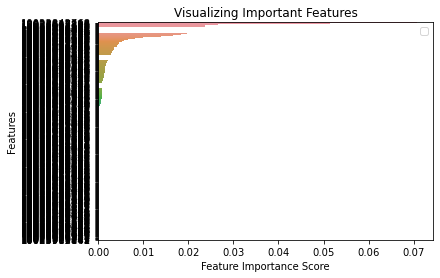

In [49]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [50]:
xnew={}
for i in feature_importance.index:
    xnew[i]=expression[i]
xnew=pd.DataFrame(x)
# Split dataset into training set and test set
Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(xnew, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [51]:
#Create a Gaussian Classifier
clfnew=RandomForestClassifier(n_estimators=30,oob_score = True)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfnew.fit(Xnew_train,ynew_train)

# prediction on test set
ynew_pred=clf.predict(Xnew_test)

In [52]:
print(clfnew.oob_score_)

0.855072463768116


In [53]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ynew_test, ynew_pred))

Accuracy: 0.968944099378882


In [54]:
feature_importance.index.name='ID'
feature_importance.index = pd.to_numeric(feature_importance.index)
feature_importance

,Score
ID,
10023842768,0.070796
10023847138,0.055918
10023825802,0.051418
10025911219,0.027857
10025907238,0.026543
...,...
10023827143,0.000440
10025912569,0.000418
10023817251,0.000414


In [55]:
annotation=pd.read_csv(r'Annotation_after_Go_and_ttest.csv',  sep = ',')
annotation.index=annotation['ID']
annotation=annotation.iloc[:,1:]
#annotation

In [56]:
rf_feature_importance = pd.merge(feature_importance, annotation, left_on='ID', right_on='ID', how='left')
rf_feature_importance.to_csv("FeatureImportance_RandomForest.csv")

In [57]:
#NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
RANDOM_STATE = 123
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]


/Users/iriszhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/iriszhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/iriszhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/iriszhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/iriszhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarn

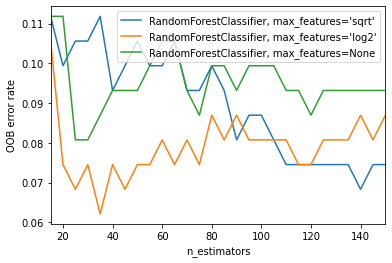

In [58]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(Xnew_test, ynew_test)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()